<a href="https://colab.research.google.com/github/Ninjapack/ai_lab/blob/main/Lab1_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))
inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


In [3]:
noise = np.random.uniform (low=-1,high=1, size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_dataset', inputs-inputs, targets-targets)
print(targets.shape)

(1000, 1)


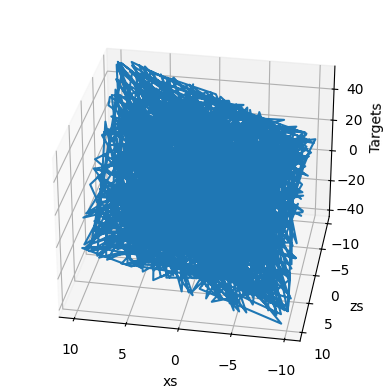

In [4]:
targets = targets.reshape(-1,)
xs = xs.reshape(-1,)
zs = zs.reshape(-1,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [5]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

[[-0.01513279]
 [ 0.00171147]] [-0.08076344]


In [6]:
targets = targets.reshape(observations, 1)  # przekształcić z powrotem
eta = 0.02
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - eta * np.dot(inputs.T, deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)


225.54248197708466
39.576355904878696
15.31161600406611
11.796575690911057
10.962491977425033
10.488388774187246
10.075135886687194
9.683631480421168
9.308283857802644
8.947844101895924
8.60164473207535
8.26911338135352
7.949709171152008
7.642913725686824
7.348229281581088
7.065177744393218
6.793299895351597
6.532154644041627
6.281318312491356
6.040383947764498
5.808960661721408
5.586672996847602
5.373160317117318
5.1680762229032355
4.971087988983163
4.781876024731848
4.60013335562214
4.425565125194336
4.257888116685679
4.096830293543916
3.9421303580794467
3.793537327540066
3.6508101269204563
3.513717197845895
3.3820361228955553
3.255553264755974
3.1340634196192254
3.017369484263476
2.905282136275794
2.7976195268984494
2.6942069860003195
2.5948767386948184
2.499467633144539
2.407824879111045
2.3197997968256066
2.235249575773471
2.1540370430003275
2.0760304405650474
2.0011032117776684
1.9291337958758035
1.860005430806357
1.7936059637926123
1.7298276693793064
1.6685670746605545
1.6097247

In [7]:
print (weights,biases)

[[ 1.99778225]
 [-3.00562274]] [4.29506251]


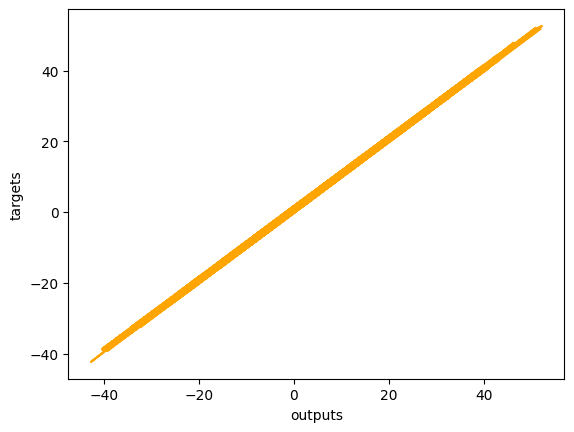

In [8]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()